In [1]:
## Step 1: Loading Data
# Read the Iowa data file into a Pandas DataFrame called `home_data`.


In [2]:
import pandas as pd

# Path of the file to read
iowa_file_path = '/Users/jpalbino/downloads/Kaggle Machine Learning Intro/data/train.csv'

# Fill in the line below to read the file into a variable home_data
home_data = pd.read_csv(iowa_file_path)

In [5]:
## Step 2: Review the data
#Use the command you learned to view summary statistics of the data. Then fill in variables to answer the following questions

In [6]:
# Print summary statistics in next line
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = 10517

# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = 2019 - 2010

In [8]:
avg_lot_size

10517

In [9]:
newest_home_age

9

In [11]:
CountYrBuilt=home_data.groupby("YearBuilt").YearBuilt.count()
CountYrRemod=home_data.groupby("YearRemodAdd").YearRemodAdd.count()
CountYrSold=home_data.groupby("YrSold").YrSold.count()

AttributeError: 'AxesSubplot' object has no attribute 'settitle'

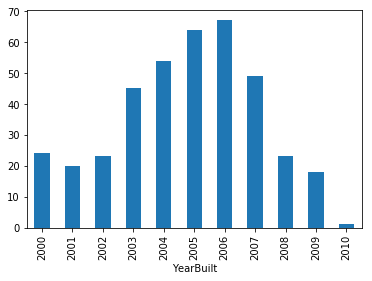

In [30]:
Yr21stCenYrBuilt=[IndexYear for IndexYear in CountYrBuilt.index if IndexYear >=2000] 
ax1=CountYrBuilt[Yr21stCenYrBuilt].plot.bar()
ax1.settitle("Count of YearBuild in the 21st Century") 
print(CountYrBuilt[Yr21stCenYrBuilt])

AttributeError: 'AxesSubplot' object has no attribute 'settitle'

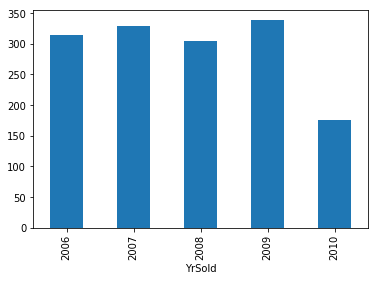

In [31]:
Yr21stCenYrSold=[IndexYear for IndexYear in CountYrSold.index if IndexYear >=2000] 
ax3=CountYrSold[Yr21stCenYrSold].plot.bar()
ax3.settitle("Count of YearSold in the 21st Century") 
print(CountYrSold[Yr21stCenYrSold])

AttributeError: 'AxesSubplot' object has no attribute 'settitle'

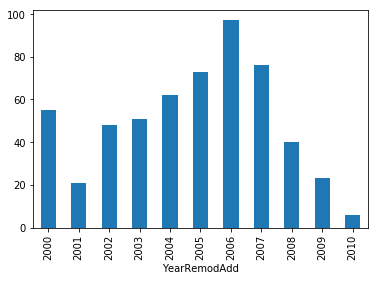

In [33]:
Yr21stCenYrRemod=[IndexYear for IndexYear in CountYrRemod.index if IndexYear >=2000] 
ax2=CountYrRemod[Yr21stCenYrRemod].plot.bar()
ax2.settitle("Count of YearRemod in the 21st Century") 
print(CountYrRemod[Yr21stCenYrRemod])

In [34]:
Avg_price_by_year_month = pd.DataFrame(home_data.groupby(["YrSold","MoSold"]).SalePrice.mean().round())
Cnt_price_by_year_month = pd.DataFrame(home_data.groupby(["YrSold","MoSold"]).SalePrice.count().round())

In [44]:
price_table = Avg_price_by_year_month.merge(Cnt_price_by_year_month,on = ["YrSold","MoSold"])
price_table = price_table.rename(index = str, columns = {"SalePrice_x": "Avg_SalePrice", "SalePrice_y": "SaleCount"})


In [45]:
price_table

Avg_SalePrice  SaleCount
YrSold MoSold                          
2006   1            201090.0         10
       2            194322.0          9
       3            184982.0         25
       4            174313.0         27
       5            158928.0         38
       6            172283.0         48
       7            183211.0         67
       8            196240.0         23
       9            223769.0         15
       10           172357.0         24
       11           213285.0         16
       12           185545.0         12
2007   1            183235.0         13
       2            176302.0          8
       3            176568.0         23
       4            170773.0         23
       5            169874.0         43
       6            179726.0         59
       7            195397.0         51
       8            183941.0         40
       9            195534.0         11
       10           215429.0         16
       11           197709.0         24
       12           214414.0         18
2008   1            178505.0         13
       2            159370.0         10
       3            178505.0         18
       4            159293.0         26
       5            188334.0         38
       6            169731.0         51
       7            174563.0         49
       8            196077.0         29
       9            169626.0         17
       10           166691.0         22
       11           210981.0         17
       12           175600.0         14
2009   1            189736.0         12
       2            187450.0         10
       3            171547.0         19
       4            181681.0         26
       5            164483.0         37
       6            183261.0         59
       7            197984.0         61
       8            165671.0         30
       9            196849.0         20
       10           175207.0         27
       11           156382.0         22
       12           164015.0         15
2010   1            163853.0         10
       2            174823.0         15
       3            203181.0         21
       4            171344.0         39
       5            178422.0         48
       6            181640.0         36
       7            121750.0          6

In [47]:
Avgpricebyyearmonth = pd.DataFrame(home_data.groupby(["YrSold","MoSold"]).SalePrice.mean().round()) 
Cntpricebyyearmonth = pd.DataFrame(home_data.groupby(["YrSold","MoSold"]).SalePrice.count().round())

In [59]:
pricetable = Avgpricebyyearmonth.merge(Cntpricebyyearmonth,on = ["YrSold","MoSold"]) 
pricetable = pricetable.rename(index = str, columns = {"SalePricex": "AvgSalePrice", "SalePricey": "SaleCount" })

In [60]:
pricetable.reset_index(inplace=True) ### line added for simplicity

In [61]:
pricetable['Period'] = pd.to_datetime(pricetable['YrSold'].astype(str) + pricetable['MoSold'].astype(str),
format='%Y%m', errors='ignore')

In [62]:
pricetable['Period'] = pricetable['Period'].dt.strftime("%Y-%m")

In [63]:
import matplotlib.pyplot as plt

In [70]:
pricetable.plot.bar(x="Period",y="MoSold",legend=None, figsize=(20, 10), color='navy')
plt.xticks(rotation=45)
plt.title("SaleCount by Year and Month", fontsize = 20)
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

In [67]:
pricetable.describe()

,SalePrice_x,SalePrice_y
count,55.000000,55.000000
mean,181377.854545,26.545455
std,17728.649276,15.617913
min,121750.000000,6.000000
25%,171058.500000,15.000000
50%,178505.000000,23.000000
75%,194859.500000,37.500000
max,223769.000000,67.000000


In [69]:
pricetable

,YrSold,MoSold,SalePrice_x,SalePrice_y,Period
0,2006,1,201090.0,10,2006-01
1,2006,2,194322.0,9,2006-02
2,2006,3,184982.0,25,2006-03
3,2006,4,174313.0,27,2006-04
4,2006,5,158928.0,38,2006-05
5,2006,6,172283.0,48,2006-06
6,2006,7,183211.0,67,2006-07
7,2006,8,196240.0,23,2006-08
8,2006,9,223769.0,15,2006-09
9,2006,10,172357.0,24,2006-10
